## Day 11 - Simple Moving Average, Exponential Moving Average and strategies

**SMA** :  a technical analysis tool that tries to cut out the noise from the trend, by updating the average price in a given period. In theory, if the price is above the MA the trend is up, and vice versa.

**EMA** : the idea is the similar to the previous one, but the exponential moving average gives more importance (in terms of weights) to the most recent observations. 

$$ SMA = \frac {A_1, ... , A_2} {n} $$

$$EMA = VALUE_{today} * (\frac{Smooth} {1 + Days}) + EMA_{yesterday} * (1 - \frac{Smooth} {1 + Days})$$

### **Get the data and MAs implementation**

In [2]:
import pandas as pd
import numpy as np
import yfinance as yf

import plotly.graph_objects as go   

In [198]:
"""
    :param ticker: closing prices
    :param start: history start date
    :param end: history end date
    :return: stock's historical data 
"""
def get_data(ticker,start="2018-03-25"):
    
    return yf.download(ticker, start)


"""
    :param close: closing prices
    :param length: moving average length
    :return: stock's simple moving average (SMA)
"""
def get_SMA(close,length=20):
    return close.rolling(window=length).mean()


"""
    :param close: closing prices
    :param length: moving average length
    :return: stock's exponential moving average (EMA)
    
"""
def get_EMA(close,length=20):
    return close.ewm(span=length, adjust=False).mean()

### **Strategy 1 - Simple Crossover**
When the price crosses above or below a moving average to signal a potential change in trend. 

In [200]:
"""
    :param close: closing prices
    :param len_moving_average: moving average length
    :return buy: list with buy's signals (indexes)
    :return sell: list with sell's signals (indexes)
    :return df_signal_1: new dataframe that contains "close" and "sma"
    
    buy if the price crosses above the MA, so if:
        - close_previous < ma
        - close_next > ma
    
    sell if the price crosses below the MA, so if:
        - close_previous > ma
        - close_next < ma
    
"""
def get_signal_1(close, len_moving_average=20):
    
    ma_1 = get_SMA(close,length=len_moving_average)
    
    df_signal_1 = pd.DataFrame({'ma' : ma_1, 
                                'close' : amzn_close}).dropna()
    
    buy = []
    sell = []
    
    for i in range(len(df_signal_1)-1):
        
        if df_signal_1.close.iloc[i-1] < df_signal_1.ma.iloc[i] \
        and df_signal_1.close.iloc[i+1] > df_signal_1.ma.iloc[i]:
            buy.append(i)
        
        if df_signal_1.close.iloc[i-1] > df_signal_1.ma.iloc[i] \
        and df_signal_1.close.iloc[i+1] < df_signal_1.ma.iloc[i]:
            sell.append(i)
    
    
    return buy, sell, df_signal_1


## -- to do : implement a sort of tolerance, in order to avoid multiple trades

[*********************100%***********************]  1 of 1 completed


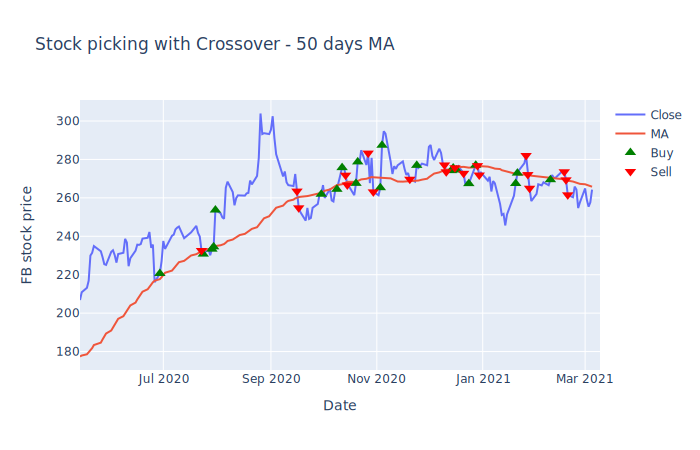

In [215]:
stock_history_1  = get_data('FB','2020-03-06')
stock_history_1 = stock_history_1['Adj Close']
buy_1, sell_1, df_signal_1 = get_signal_1(stock_history_1, 50)

fig_s1 = go.Figure()
fig_s1.add_trace(go.Scatter(x=df_signal_1.index, y=df_signal_1['close'], name='Close'))
fig_s1.add_trace(go.Scatter(x=df_signal_1.index, y=df_signal_1['ma'], name='MA'))


fig_s1.add_traces(go.Scatter(x=df_signal_1.iloc[buy_1].index, y=df_signal_1.iloc[buy_1]['close'], name='Buy',
                          mode='markers', marker=dict(color='green', size=10, symbol='triangle-up')))
fig_s1.add_traces(go.Scatter(x=df_signal_1.iloc[sell_1].index, y=df_signal_1.iloc[sell_1]['close'], name='Sell',
                          mode='markers', marker=dict(color='red', size=10, symbol='triangle-down')))

fig_s1.update_layout(
    title="Stock picking with Crossover - 50 days MA",
    xaxis_title="Date",
    yaxis_title="FB stock price"
)

#fig_s1.show()

#static rendering for github
fig_s1.show("svg")

### **Strategy 2 - Crossover with two SMAs**
Recall : apply two moving averages to a chart: one longer and one shorter. When the shorter-term MA crosses above the longer-term MA, it's a buy signal, as it indicates that the trend is shifting up. This is known as a "golden cross." Meanwhile, when the shorter-term MA crosses below the longer-term MA, it's a sell signal, as it indicates that the trend is shifting down. This is known as a "dead/death cross." 

In [210]:
"""
    :param close: closing prices
    :param len_moving_average: moving average length
    :return buy: list with buy's signals (indexes)
    :return sell: list with sell's signals (indexes)
    :return df_signal_2: new dataframe that contains "close" and "sma(s)"
    
    signal = 1 if shorter-term MA crosses above the longer-term MA
    signal = -1 if shorter-term MA crosses below the longer-term MA
    
"""
def get_signal_2(close, len_short_ma=20, len_long_ma=100):
    
    ma_short = get_SMA(close,length=len_short_ma)
    ma_long = get_SMA(close,length=len_long_ma)
    
    df_signal_2 = pd.DataFrame({'ma_short' : ma_short, 
                                'ma_long' : ma_long,
                                'close' : amzn_close}).dropna()
    
    buy = []
    sell = []
    
    for i in range(len(df_signal_2)-1):
        
        if df_signal_2.ma_short.iloc[i-1] < df_signal_2.ma_long.iloc[i] \
        and df_signal_2.ma_short.iloc[i+1] > df_signal_2.ma_long.iloc[i]:
            buy.append(i)
        
        if df_signal_2.ma_short.iloc[i-1] > df_signal_2.ma_long.iloc[i] \
        and df_signal_2.ma_short.iloc[i+1] < df_signal_2.ma_long.iloc[i]:
            sell.append(i)
    
    
    return buy, sell, df_signal_2

[*********************100%***********************]  1 of 1 completed


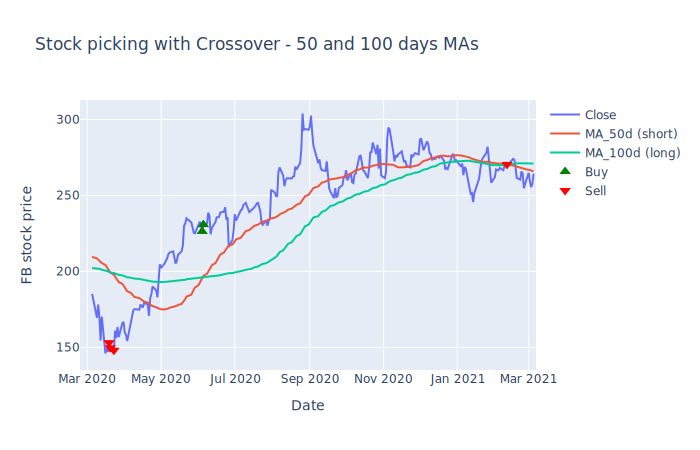

In [214]:
stock_history_2  = get_data('FB','2016-03-06')
stock_history_2 = stock_history_2['Adj Close']
buy_2, sell_2, df_signal_2 = get_signal_2(stock_history_2, 50, 100)

fig_s2 = go.Figure()
fig_s2.add_trace(go.Scatter(x=df_signal_2.index, y=df_signal_2['close'], name='Close'))
fig_s2.add_trace(go.Scatter(x=df_signal_2.index, y=df_signal_2['ma_short'], name='MA_50d (short)'))
fig_s2.add_trace(go.Scatter(x=df_signal_2.index, y=df_signal_2['ma_long'], name='MA_100d (long)'))


fig_s2.add_traces(go.Scatter(x=df_signal_2.iloc[buy_2].index, y=df_signal_2.iloc[buy_2]['close'], name='Buy',
                          mode='markers', marker=dict(color='green', size=10, symbol='triangle-up')))
fig_s2.add_traces(go.Scatter(x=df_signal_2.iloc[sell_2].index, y=df_signal_2.iloc[sell_2]['close'], name='Sell',
                          mode='markers', marker=dict(color='red', size=10, symbol='triangle-down')))

fig_s2.update_layout(
    title="Stock picking with Crossover - 50 and 100 days MAs",
    xaxis_title="Date",
    yaxis_title="FB stock price"
)

#fig_s2.show()

#static rendering for github
fig_s2.show("svg")

### **Strategy 3 - Crossover with two EMAs**
This is the same as the previous one, but here we work with EMAs instead of SMAs

In [208]:
"""
    :param close: closing prices
    :param len_moving_average: moving average length
    :return buy: list with buy's signals (indexes)
    :return sell: list with sell's signals (indexes)
    :return df_signal_2: new dataframe that contains "close" and "ema(s)"
"""
def get_signal_3(close, len_short_ma=20, len_long_ma=100):
    
    ma_short = get_EMA(close,length=len_short_ma)
    ma_long = get_EMA(close,length=len_long_ma)
    
    df_signal_3 = pd.DataFrame({'ma_short' : ma_short, 
                                'ma_long' : ma_long,
                                'close' : close}).dropna()
    
    buy = []
    sell = []
    
    for i in range(len(df_signal_3)-1):
        
        if df_signal_3.ma_short.iloc[i-1] < df_signal_3.ma_long.iloc[i] \
        and df_signal_3.ma_short.iloc[i+1] > df_signal_3.ma_long.iloc[i]:
            buy.append(i)
        
        if df_signal_3.ma_short.iloc[i-1] > df_signal_3.ma_long.iloc[i] \
        and df_signal_3.ma_short.iloc[i+1] < df_signal_3.ma_long.iloc[i]:
            sell.append(i)
    
    
    return buy, sell, df_signal_3

## -- to do : implement a sort of tolerance, in order to avoid multiple trades

[*********************100%***********************]  1 of 1 completed


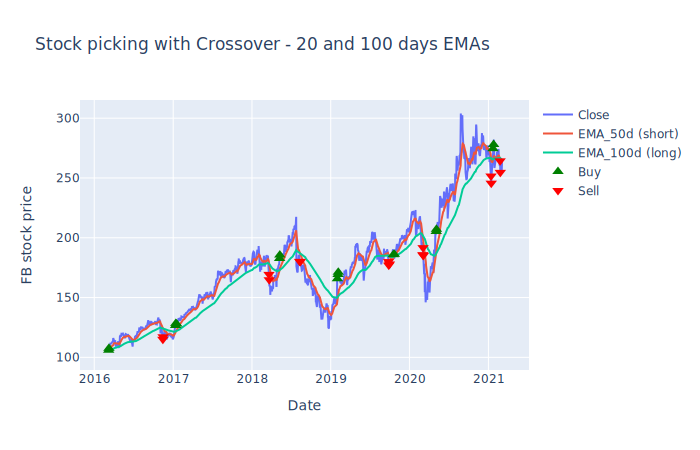

In [213]:
stock_history_3  = get_data('FB','2016-03-06')
stock_history_3 = stock_history_3['Adj Close']
buy_3, sell_3, df_signal_3 = get_signal_3(stock_history_3, 20, 100)

fig_s3 = go.Figure()
fig_s3.add_trace(go.Scatter(x=df_signal_3.index, y=df_signal_3['close'], name='Close'))
fig_s3.add_trace(go.Scatter(x=df_signal_3.index, y=df_signal_3['ma_short'], name='EMA_50d (short)'))
fig_s3.add_trace(go.Scatter(x=df_signal_3.index, y=df_signal_3['ma_long'], name='EMA_100d (long)'))


fig_s3.add_traces(go.Scatter(x=df_signal_3.iloc[buy_3].index, y=df_signal_3.iloc[buy_3]['close'], name='Buy',
                          mode='markers', marker=dict(color='green', size=10, symbol='triangle-up')))
fig_s3.add_traces(go.Scatter(x=df_signal_3.iloc[sell_3].index, y=df_signal_3.iloc[sell_3]['close'], name='Sell',
                          mode='markers', marker=dict(color='red', size=10, symbol='triangle-down')))

fig_s3.update_layout(
    title="Stock picking with Crossover - 20 and 100 days EMAs",
    xaxis_title="Date",
    yaxis_title="FB stock price"
)

#fig_s3.show()

#static rendering for github
fig_s3.show("svg")